<a href="https://colab.research.google.com/github/felpk/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

Data collection

In [2]:
!wget -O diabetes.csv https://www.dropbox.com/scl/fi/0uiujtei423te1q4kvrny/diabetes.csv?rlkey=20xvytca6xbio4vsowi2hdj8e&e=1&dl=0

--2024-12-03 16:19:59--  https://www.dropbox.com/scl/fi/0uiujtei423te1q4kvrny/diabetes.csv?rlkey=20xvytca6xbio4vsowi2hdj8e
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f0c000bd3c306856d13667607.dl.dropboxusercontent.com/cd/0/inline/CfiJarAIDjG0FoqGj8d7qMoY3GYoaXAaKCLKS5mj_6k73W4aVQoFhMDJUxyr9UyJKPQWugzuFZrmOD3_InfuPqmwppG-z7m9_E6DNt4gwKa7k9eYY2BOk92wvy44-JV0YyoaJA5Y6pn7ahIWIm0lYTlJ/file# [following]
--2024-12-03 16:20:01--  https://uc8f0c000bd3c306856d13667607.dl.dropboxusercontent.com/cd/0/inline/CfiJarAIDjG0FoqGj8d7qMoY3GYoaXAaKCLKS5mj_6k73W4aVQoFhMDJUxyr9UyJKPQWugzuFZrmOD3_InfuPqmwppG-z7m9_E6DNt4gwKa7k9eYY2BOk92wvy44-JV0YyoaJA5Y6pn7ahIWIm0lYTlJ/file
Resolving uc8f0c000bd3c306856d13667607.dl.dropboxusercontent.com (uc8f0c000bd3c306856d13667607.dl.dropboxusercontent.com)... 162.125.2.15, 2620

In [3]:
diabetes_dataset = pd.read_csv('diabetes.csv')

Data Analysis

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_dataset.shape

(768, 9)

Describing the data

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Describing the data by the label (0 for negative, 1 for positive diabetes)

In [7]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Ploting a bar chart to visualize the differences between the both outcomes

<Figure size 1200x600 with 0 Axes>

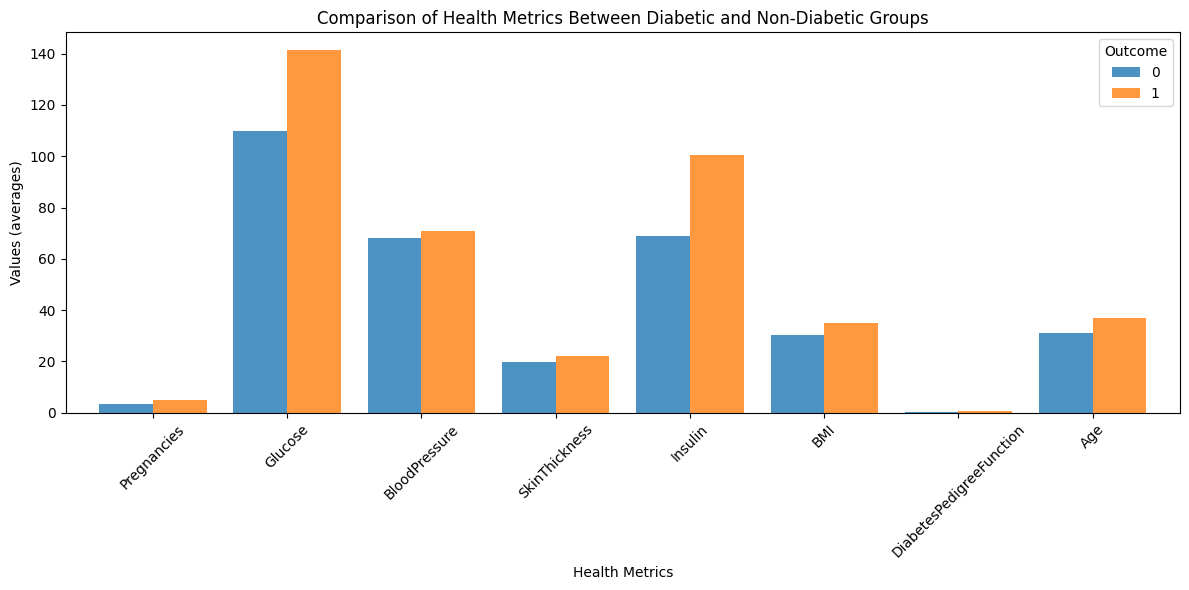

In [8]:
plt.figure(figsize=(12, 6))
diabetes_dataset.groupby("Outcome").mean().T.plot(kind='bar', figsize=(12, 6), alpha=0.8, width=0.8)
plt.title("Comparison of Health Metrics Between Diabetic and Non-Diabetic Groups")
plt.xlabel("Health Metrics")
plt.ylabel("Values (averages)")
plt.xticks(rotation=45)
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

In [9]:
X = diabetes_dataset.drop(columns='Outcome')
Y = diabetes_dataset['Outcome']

Standardize data

In [10]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [11]:
X = standardized_data
Y = diabetes_dataset['Outcome']

Train, test split data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [14]:
classifier = svm.SVC(kernel='linear')

In [15]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model evaluation on train data

In [16]:
#accuracy in the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print(f'Accuracy score of the training data: {(training_data_accuracy * 100):.2f}%')

Accuracy score of the training data: 78.66%


Prediction on test data

In [18]:
classifier.fit(X_test, Y_test)

SVC(kernel='linear')

Model evaluaton on test data

In [19]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
#accuracy in the test data
print(f'Accuracy score of the test data: {(test_data_accuracy * 100):.2f}%')

Accuracy score of the test data: 75.32%


In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)

#transform into an array
input_data_as_numpy_array = np.asarray(input_data)

#reshape to one instance
input_data_as_numpy_array_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardize the input
std_input_data = scaler.transform(input_data_as_numpy_array_reshaped)

#make the prediction
prediction = classifier.predict(std_input_data)

if prediction[0] == 0:
  print('The person is not diabetic')
  print(f'Accuracy score of the test data: {(test_data_accuracy*100):.2f}%')
else:
  print('The person is diabetic')
  print(f'Accuracy score of the test data: {(test_data_accuracy*100):.2f}%')

The person is diabetic
Accuracy score of the test data: 75.32%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: give me a description about this project

This project uses a Support Vector Machine (SVM) model to predict the likelihood of diabetes in a patient based on several health metrics.  It begins by downloading a diabetes dataset, then performs exploratory data analysis (EDA) including calculating descriptive statistics and visualizing the mean values of different health metrics for diabetic and non-diabetic individuals.  The data is then preprocessed by standardizing the features using `StandardScaler`.  The dataset is split into training and testing sets.  An SVM classifier with a linear kernel is trained on the training data and its accuracy is evaluated.  The model is then used to predict diabetes on the test data, and its accuracy is assessed.  Finally, the code demonstrates how to use the trained model to predict diabetes for a single patient given input data representing their health metrics.  The prediction is presented along with the model's accuracy on the test data.
